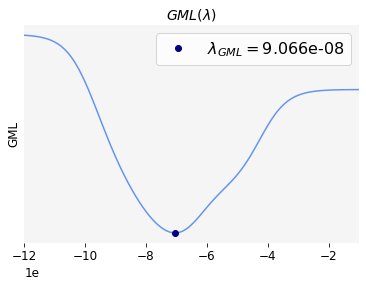

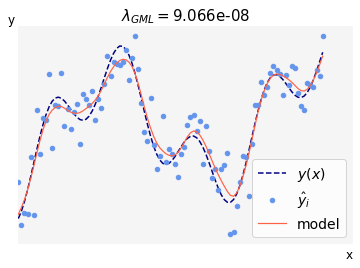

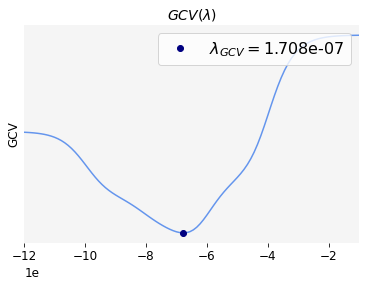

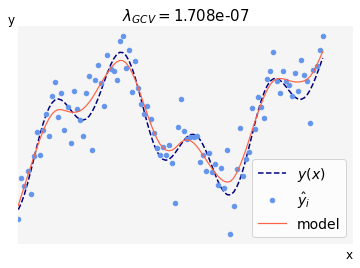

In [5]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.optimize import minimize_scalar
import egrss 
import lambda_fun 
import os

np.random.seed(1)

# plotting 2 plots: 1) the minimizer of lambda 2) the model with the min lambda
def plot2_w_lambda(fun, title, lab, ylab, savename1, savename2):
    def y(x):
        return 0.25*np.cos(4*np.pi*x) + 0.15*np.sin(12*np.pi *x) + 0.2 * x
    a,b = -0.2, 0.5
    N = 100
    p = 2
    xi = (b-a) ** (2 * p - 1) 
    x = np.linspace(a,b,N)
    yhat = y(x) + 0.1 * np.random.normal(loc = 0, scale = 1, size = N)
    # finding the minimizer
    min_point = fun(N= 100, x = x, p = 2, yhat = yhat, method = 'golden',  usage = 'min')

    # plotting fun(lambda)
    fig1 = plt.figure()
    q = np.linspace(1,12,100)
    res = fun(N= 100, x = x, p = 2, yhat = yhat, method = 'golden', usage = 'evaluate',  bounds = 'nothing',  q = q)
    plt.plot(-q,res, color = 'cornflowerblue')
    plt.plot(-min_point.x, min_point.fun, 'bo', color = 'navy', label = lab %(np.format_float_scientific(1/np.power(10,min_point.x), precision = 3, exp_digits=2)))
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.xlabel('1e', loc = 'left', fontsize = 12)
    plt.ylabel(ylab, fontsize = 12)
    plt.xlim([-12,-1])
    plt.xticks(fontsize = 12)
    plt.yticks([])
    plt.title(title , fontsize = 14)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.legend( loc='upper right', numpoints=1, prop={'size': 16} )
    plt.show
    my_path = os.getcwd()
    fig1.savefig(my_path + savename1, bbox_inches='tight')

    # plotting the model alongside simulated datapoints and y(x)
    fig2 = plt.figure()
    lam = 1/np.power(10,min_point.x)
    Ut, Vt = egrss.generators((x-a)/(b-a),p)
    Wt, z  = egrss.potrf(Ut,Vt,N*lam/xi)
    c,d    = lambda_fun.smoothing_spline_reg(Ut,Wt,z,yhat)
    plt.plot(x,y(x),'--',color = 'navy', linewidth=1.5)
    plt.plot(x,yhat,'bo',markersize = 4.5, color = 'cornflowerblue')
    plt.plot(x,yhat-N*lam/xi*c,color = 'tomato', linewidth=1.2)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('x', loc = 'right', fontsize = 12)
    plt.ylabel('y', loc = 'top', rotation = 0, fontsize = 12)
    plt.xlim([a,b+0.07])
    plt.tick_params(left=True, bottom = False, right = False, top = False)
    plt.legend(['$y(x)$', '$\hat{y}_i$', 'model'], numpoints = 1, prop = {'size': 14}, loc = 'lower right')
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.title(lab %(np.format_float_scientific(1/np.power(10,min_point.x), precision = 3, exp_digits=2)), fontsize = 15)
    plt.show()
    fig2.savefig(my_path + savename2, bbox_inches='tight')

plot2_w_lambda(fun = lambda_fun.min_GML, title = '$GML(\lambda)$', lab = "$\lambda_{GML}=$%s", ylab = 'GML', savename1 = "/Plots/GMLlambda.pdf", savename2 = "/Plots/GMLmodel.pdf")

plot2_w_lambda(fun = lambda_fun.min_GCV, title = '$GCV(\lambda)$', lab = "$\lambda_{GCV}=$%s", ylab = 'GCV', savename1 = "/Plots/GCVlambda.pdf", savename2 = "/Plots/GCVmodel.pdf")
